<a href="https://colab.research.google.com/github/imyadavkapil/YOLOv8_Detection_Results_with_Outputs/blob/main/YOLOv8_Detection_Results_with_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ## 1. Mount Google Drive (optional)
from google.colab import drive
drive.mount('/content/drive')
# Now you can save `runs/` or your dataset in Drive.

Mounted at /content/drive


In [2]:
# ## 2. Install dependencies
!pip install ultralytics roboflow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 

In [3]:
!nvidia-smi


Thu Aug  7 06:43:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# ## 3. Download/Load your Roboflow dataset
# Replace with YOUR Roboflow API key & project info.
from roboflow import Roboflow

rf = Roboflow(api_key="ylRkDGkUW8z4XVKo3Gp9")
project = rf.workspace("object-detection-cqovu") \
           .project("cars-zwxpr-zx4ck")        # e.g. "trash-detection"
dataset = project.version(1)      # e.g. 1 or "latest"
dataset.download("yolov8")                          # will unzip into /content/YOUR_PROJECT_NAME-YOUR_VERSION_NUMBER

# Directory now looks like:
# /content/<project>-<version>/
# ├── data.yaml
# ├── train/images/, train/labels/
# ├── valid/images/, valid/labels/
# └── test/images/,  test/labels/

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cars-1 in yolov8:: 100%|██████████| 1612/1612 [00:00<00:00, 4343.42it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
from roboflow import Roboflow

rf = Roboflow(api_key="ylRkDGkUW8z4XVKo3Gp9")

# List and print all workspace slugs & names
print(rf.workspace())
# for ws in rf.workspace():
#     print(f"{ws.slug:<30}  —  {ws.name}")

loading Roboflow workspace...
{
  "name": "Object Detection",
  "url": "object-detection-cqovu",
  "projects": [
    "object-detection-cqovu/cars-zwxpr-zx4ck",
    "object-detection-cqovu/object-detection-ugqwu"
  ]
}


In [5]:
# ## 4. Train YOLOv8 on your dataset
from ultralytics import YOLO

# point to the downloaded data.yaml
data_yaml = "/content/Cars-1/data.yaml"

# choose a base model or upload your own
model = YOLO("yolov8s.pt")

In [6]:
!nvidia-smi


Thu Aug  7 06:46:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
model.train(
    data=data_yaml,
    epochs=1,
    imgsz=416,
    batch=32,  # Try 32; if OOM, go to 16
    name="test_run",
    cache=True
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cars-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=test_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1241.9±600.2 MB/s, size: 108.7 KB)


train: Scanning /content/Cars-1/train/labels... 560 images, 0 backgrounds, 0 corrupt: 100%|██████████| 560/560 [00:00<00:00, 1865.63it/s]

train: /content/Cars-1/train/images/420d28175d38b77c_jpg.rf.b178778b9b072f16ce32861955148e6d.jpg: 1 duplicate labels removed
train: New cache created: /content/Cars-1/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.2GB RAM): 100%|██████████| 560/560 [00:02<00:00, 222.86it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 891.4±534.1 MB/s, size: 117.3 KB)


val: Scanning /content/Cars-1/valid/labels... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<00:00, 1157.57it/s]

val: New cache created: /content/Cars-1/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 160/160 [00:01<00:00, 123.59it/s]


Plotting labels to runs/detect/test_run/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/test_run
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      3.24G       1.18       1.75      1.244         52        416: 100%|██████████| 18/18 [00:08<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]


                   all        160        430       0.43      0.409      0.407      0.244

1 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/test_run/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/test_run/weights/best.pt, 22.5MB

Validating runs/detect/test_run/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]


                   all        160        430       0.43      0.407      0.407      0.244
Speed: 0.1ms preprocess, 2.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/test_run


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6370114890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model.train(
    data=data_yaml,
    epochs=1,
    imgsz=416,
    batch=64,
    cache=True,
    workers=2,
    name="batch_test"
)


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cars-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=batch_test, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

train: Scanning /content/Cars-1/train/labels.cache... 560 images, 0 backgrounds, 0 corrupt: 100%|██████████| 560/560 [00:00<?, ?it/s]

train: /content/Cars-1/train/images/420d28175d38b77c_jpg.rf.b178778b9b072f16ce32861955148e6d.jpg: 1 duplicate labels removed
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.2GB RAM): 100%|██████████| 560/560 [00:02<00:00, 222.24it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 772.7±494.5 MB/s, size: 117.3 KB)


val: Scanning /content/Cars-1/valid/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 160/160 [00:01<00:00, 84.72it/s]


Plotting labels to runs/detect/batch_test/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/batch_test
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      5.93G      1.079      1.253      1.136        258        416: 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


                   all        160        430      0.636      0.581      0.583      0.375

1 epochs completed in 0.003 hours.
Optimizer stripped from runs/detect/batch_test/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/batch_test/weights/best.pt, 22.5MB

Validating runs/detect/batch_test/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]


                   all        160        430      0.636      0.581      0.583      0.374
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/batch_test


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6409d45e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
 # Train! adjust epochs, batch, imgsz as needed.
results = model.train(
    data=data_yaml,
    epochs=30,         # Enough for convergence on small dataset
    imgsz=416,         # Lower image size for speed, still good accuracy
    batch=64,          # Should easily fit in T4 VRAM
    cache=True,        # Faster epochs
    workers=2,         # Speeds up data loading
    name="colab_run_fast"
)



Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Cars-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=colab_run_fast, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /content/Cars-1/train/labels.cache... 560 images, 0 backgrounds, 0 corrupt: 100%|██████████| 560/560 [00:00<?, ?it/s]

train: /content/Cars-1/train/images/420d28175d38b77c_jpg.rf.b178778b9b072f16ce32861955148e6d.jpg: 1 duplicate labels removed
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.2GB RAM): 100%|██████████| 560/560 [00:02<00:00, 223.73it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 762.5±451.8 MB/s, size: 117.3 KB)


val: Scanning /content/Cars-1/valid/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 160/160 [00:01<00:00, 92.59it/s]


Plotting labels to runs/detect/colab_run_fast/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/colab_run_fast
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.94G     0.9945      1.024      1.111        258        416: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all        160        430      0.642      0.601       0.58      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.03G      1.079      1.112      1.168        224        416: 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all        160        430      0.622      0.569      0.567      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.07G      1.099      1.008      1.165        203        416: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all        160        430      0.539      0.533      0.476       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.07G      1.125      1.024      1.196        286        416: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        160        430      0.564      0.433      0.422      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.07G      1.146      1.047      1.198        235        416: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all        160        430      0.409      0.419      0.308      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.07G      1.221      1.112      1.258        237        416: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all        160        430      0.552      0.465       0.46      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.07G      1.218      1.092      1.241        262        416: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        160        430        0.4      0.419      0.342      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.07G      1.238      1.141      1.264        228        416: 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        160        430      0.208      0.251       0.12     0.0451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.07G      1.225      1.131      1.264        277        416: 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        160        430      0.307      0.295      0.222     0.0976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.07G      1.245      1.119      1.266        257        416: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all        160        430       0.39      0.305      0.258      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.07G      1.305      1.202      1.312        245        416: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all        160        430      0.289      0.316      0.196      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.07G      1.274      1.183      1.299        306        416: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all        160        430        0.4       0.36      0.286      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.07G      1.235      1.123      1.262        246        416: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all        160        430      0.372      0.349      0.268      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.07G        1.2      1.081      1.245        241        416: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        160        430      0.292      0.279      0.177     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.07G      1.184      1.061      1.243        266        416: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all        160        430      0.384       0.45      0.333       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.07G      1.172      1.046      1.234        233        416: 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all        160        430      0.417      0.395      0.343      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.11G      1.151      1.004      1.202        221        416: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all        160        430      0.295      0.326      0.252      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.11G      1.164      1.012      1.212        285        416: 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all        160        430      0.404      0.279      0.243      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.11G      1.128      0.957       1.21        255        416: 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        160        430      0.574      0.402      0.439       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.15G      1.081     0.9419       1.18        263        416: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all        160        430      0.647      0.458      0.505      0.297


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.15G      1.104      1.095       1.18        127        416: 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        160        430      0.587      0.476      0.467      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.15G      1.079     0.9206       1.17        133        416: 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all        160        430      0.591      0.508      0.475        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.15G      1.054     0.8605      1.135        133        416: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all        160        430      0.583      0.419      0.399      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.15G      1.056     0.8285      1.129        114        416: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all        160        430      0.637       0.47      0.507      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.15G      1.016      0.797      1.118        152        416: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        160        430      0.638      0.463      0.493      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.15G     0.9754     0.7455       1.09        125        416: 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all        160        430      0.659        0.5      0.535      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.15G     0.9771     0.7162      1.091        112        416: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all        160        430      0.625      0.512      0.537      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.15G      0.911     0.6827      1.058        107        416: 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all        160        430      0.652      0.488      0.533      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.15G     0.8913      0.666      1.056         99        416: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all        160        430      0.619      0.533      0.557       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.15G     0.9087     0.6347      1.054         92        416: 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all        160        430      0.683      0.512      0.573      0.382



30 epochs completed in 0.049 hours.
Optimizer stripped from runs/detect/colab_run_fast/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/colab_run_fast/weights/best.pt, 22.5MB

Validating runs/detect/colab_run_fast/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


                   all        160        430      0.684      0.514      0.572      0.382
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/colab_run_fast


In [13]:
# ## 5. Validate & Inference
# Validate on your validation split:

# Load the trained model with your best weights
model = YOLO("runs/detect/colab_run_fast/weights/best.pt")

# Then validate
model.val(data=data_yaml)


Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1473.7±664.2 MB/s, size: 106.2 KB)


val: Scanning /content/Cars-1/valid/labels.cache... 160 images, 0 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


                   all        160        430      0.639      0.548       0.57      0.379
Speed: 0.5ms preprocess, 6.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b63701e1950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
# Create directory for new/unseen images
!mkdir -p /content/unseen

In [18]:
# (Upload your images into /content/unseen)

# Run prediction
model.predict(
    source="/content/unseen",
    save=True,
    project="runs/colab_inference",
    name="unseen_preds"
)



image 1/25 /content/unseen/2cebfd9de7c0a235697564d5ef016a9c.jpg: 416x352 3 Cars, 10.3ms
image 2/25 /content/unseen/37a82bde2dee9dbba06c6a9db0fcd1cf.jpg: 416x352 3 Cars, 9.1ms
image 3/25 /content/unseen/5694094a1763465f3601047adbedd8dc.jpg: 416x256 (no detections), 9.8ms
image 4/25 /content/unseen/8db69b468b8a4a789e2c34098c04d8ed.jpg: 416x416 2 Cars, 10.8ms
image 5/25 /content/unseen/9005e0f297b6df111812cf4ac87c7689.jpg: 416x256 2 Cars, 8.9ms
image 6/25 /content/unseen/DSC_5903.webp: 288x416 1 Car, 41.5ms
image 7/25 /content/unseen/download (1).png: 416x256 1 Car, 8.9ms
image 8/25 /content/unseen/download.png: 416x256 1 Car, 8.1ms
image 9/25 /content/unseen/fe8af88c74175ddc068ac552c041ce26.jpg: 416x256 1 Car, 8.0ms
image 10/25 /content/unseen/gettyimages-1250822659-612x612.jpg: 288x416 3 Cars, 8.8ms
image 11/25 /content/unseen/gettyimages-2149025532-612x612.jpg: 288x416 1 Car, 8.1ms
image 12/25 /content/unseen/gettyimages-2156655724-612x612.jpg: 288x416 1 Car, 8.1ms
image 13/25 /conten

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Car'}
 obb: None
 orig_img: array([[[148, 138, 120],
         [147, 133, 115],
         [149, 127, 115],
         ...,
         [ 73,  49,  31],
         [ 72,  48,  30],
         [ 71,  47,  29]],
 
        [[150, 139, 119],
         [148, 134, 116],
         [153, 130, 114],
         ...,
         [ 73,  49,  31],
         [ 72,  48,  30],
         [ 72,  48,  30]],
 
        [[146, 133, 111],
         [144, 130, 108],
         [151, 130, 109],
         ...,
         [ 75,  49,  32],
         [ 75,  49,  32],
         [ 74,  48,  31]],
 
        ...,
 
        [[129, 102,  92],
         [133, 106,  96],
         [135, 108,  98],
         ...,
         [103,  79,  61],
         [ 97,  72,  56],
         [ 90,  66,  48]],
 
        [[132, 105,  95],
         [137, 110, 100],
         [142, 115, 105],
         ...,
         [ 94,  71,  

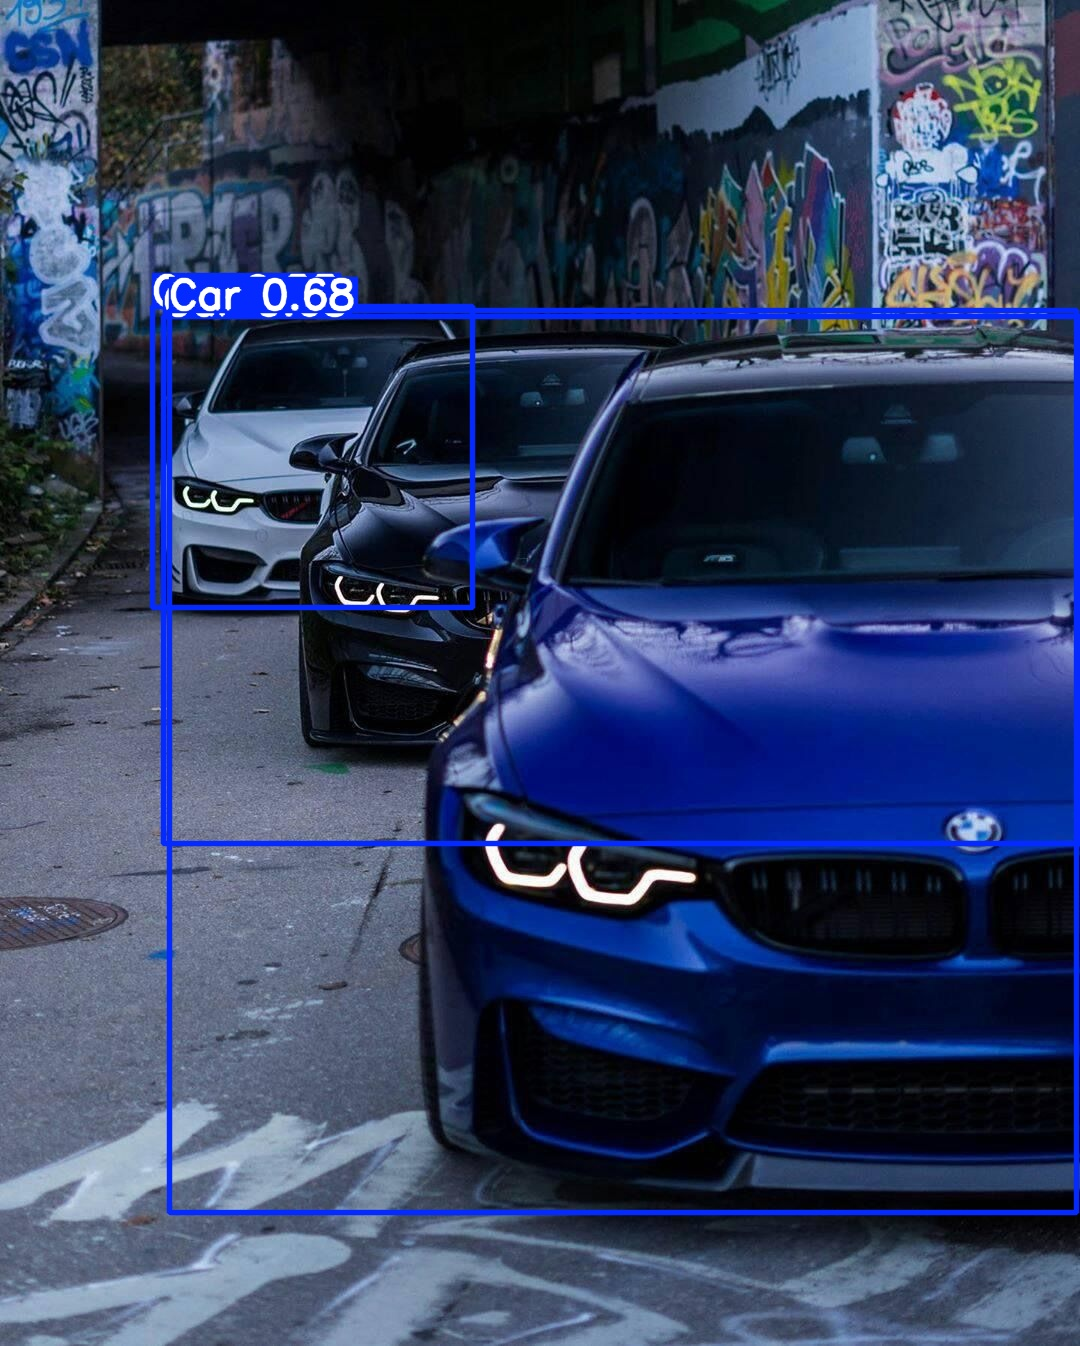

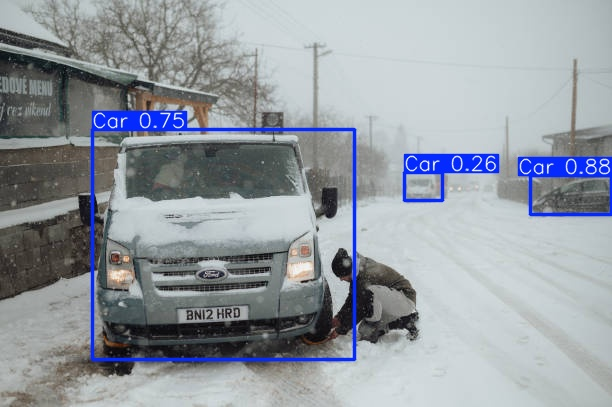

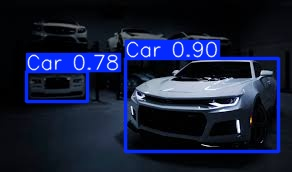

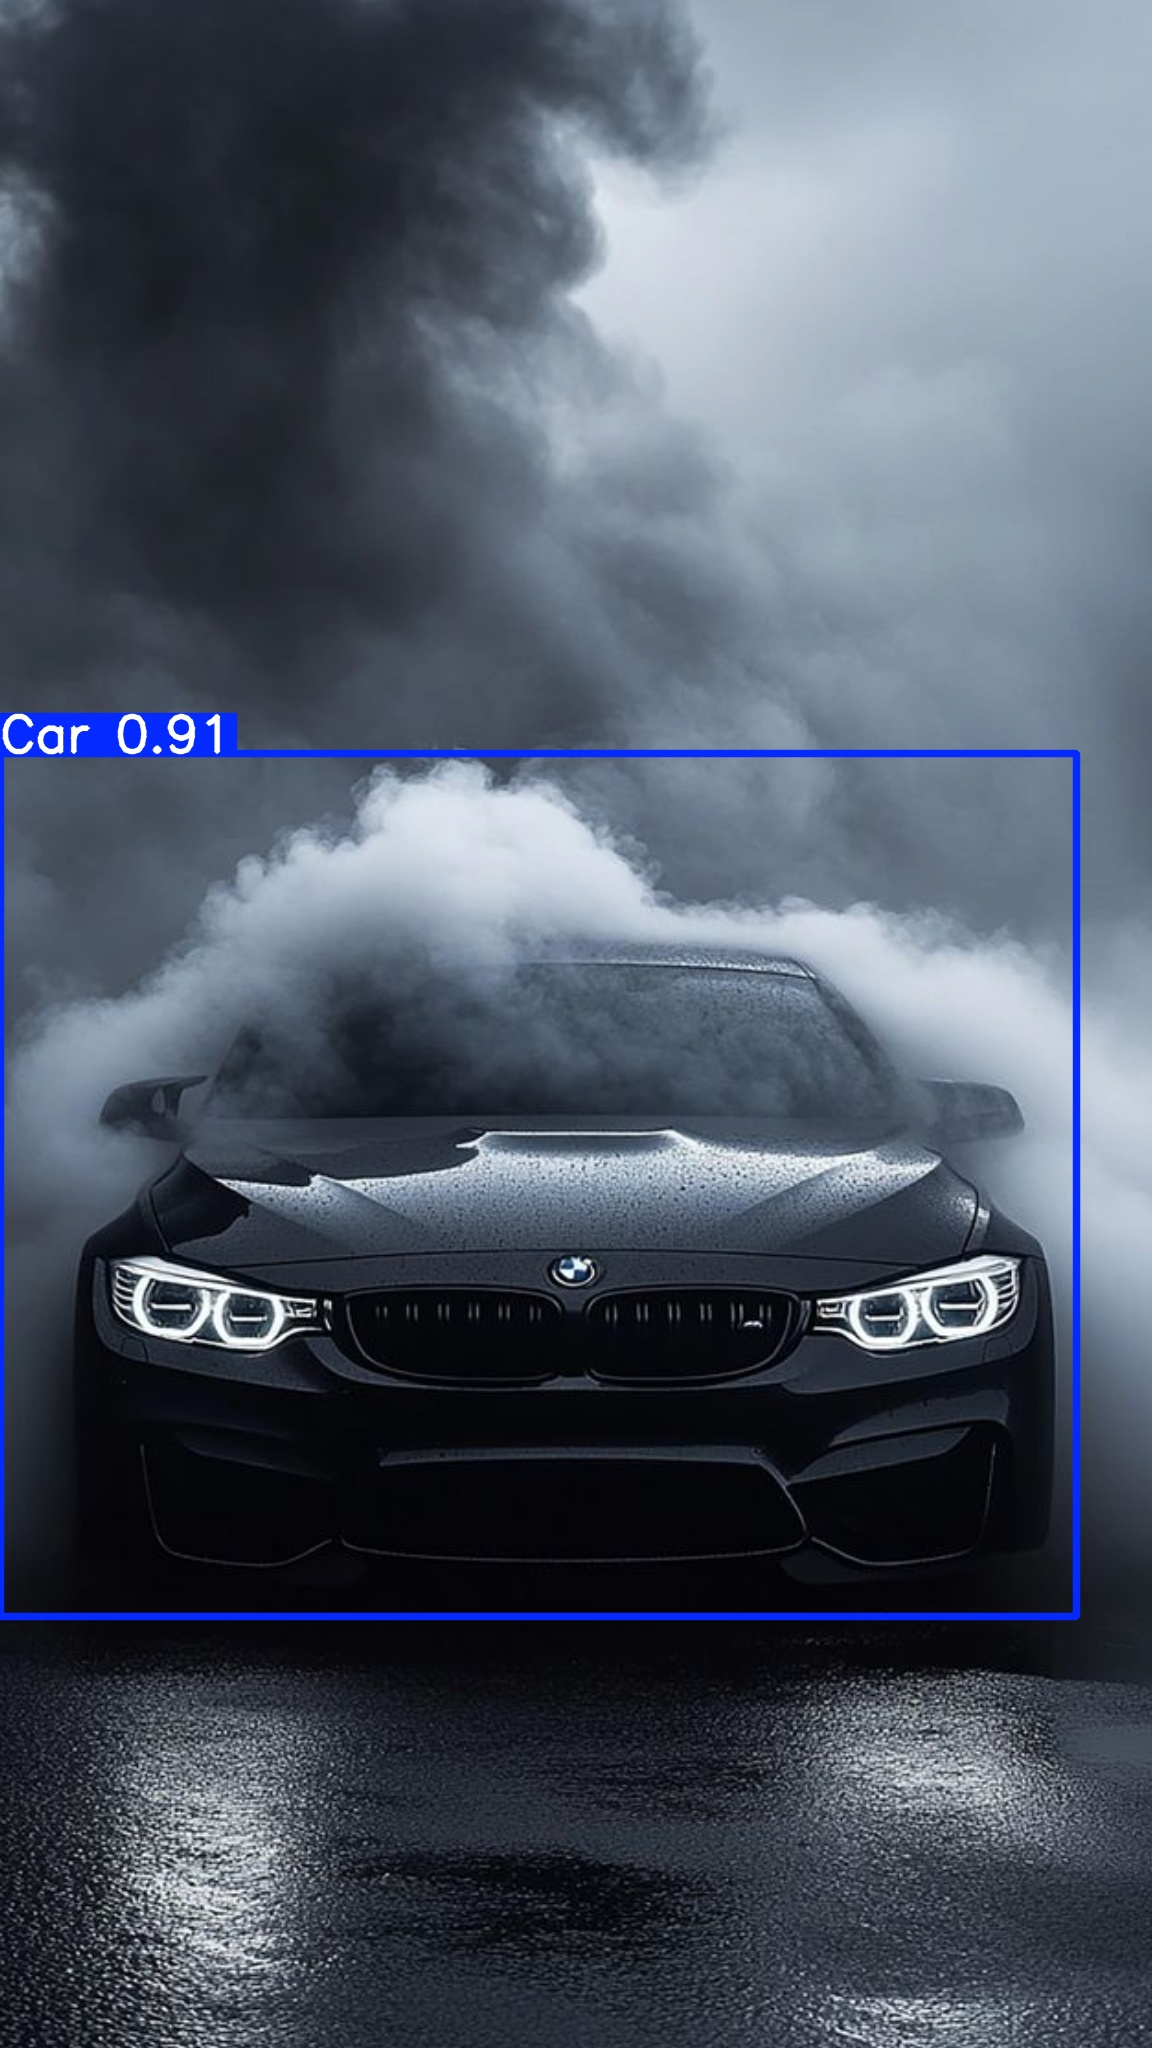

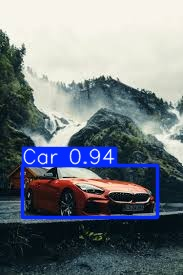

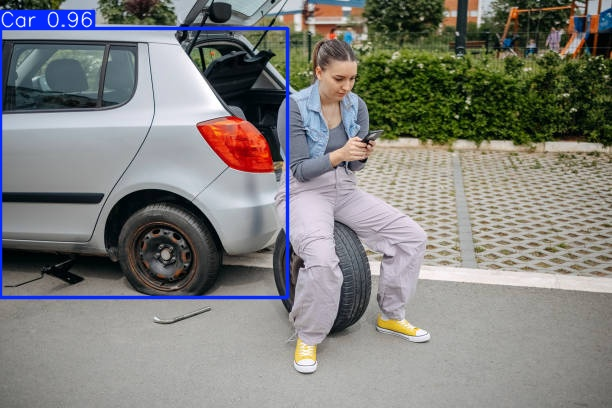

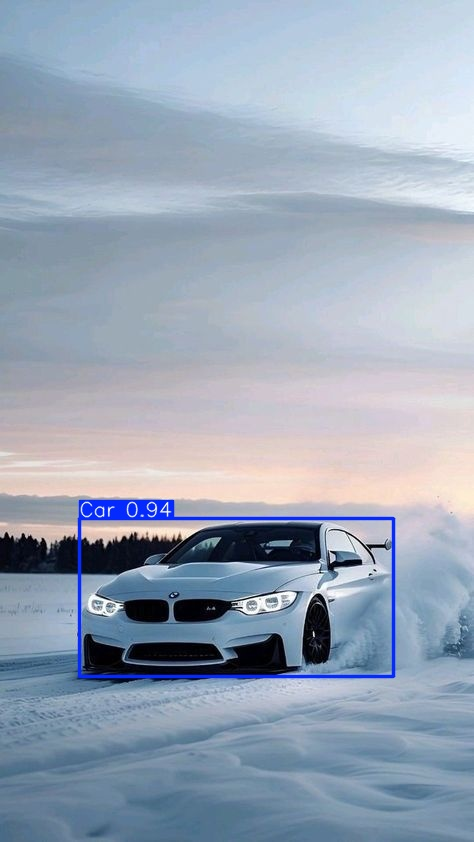

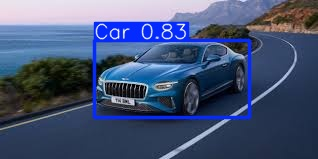

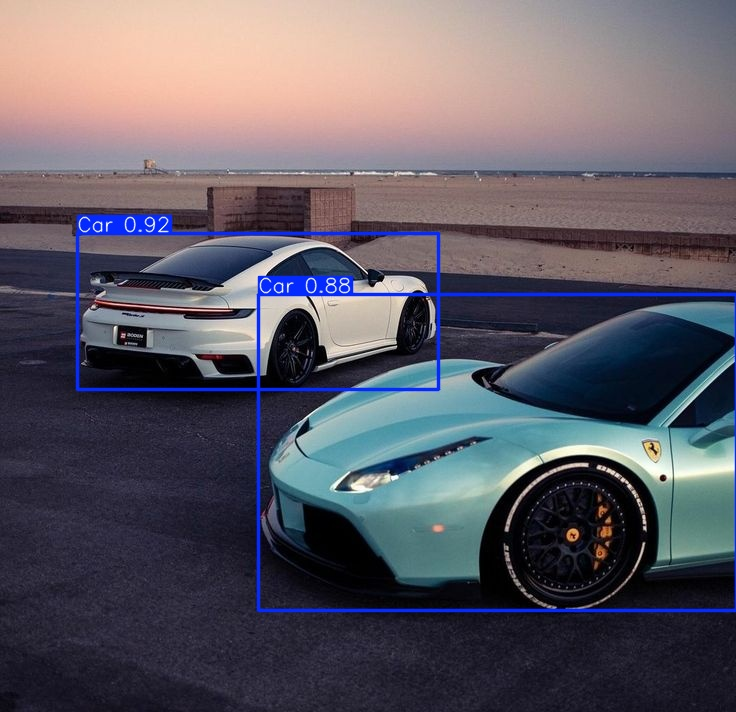

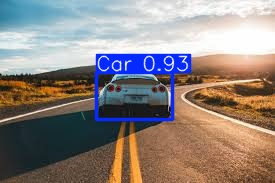

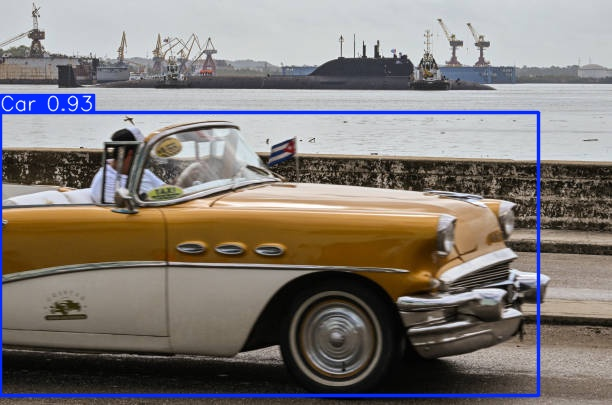

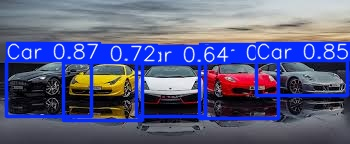

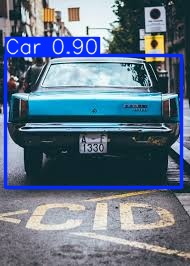

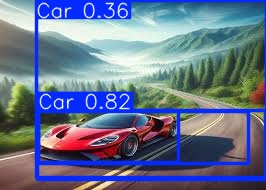

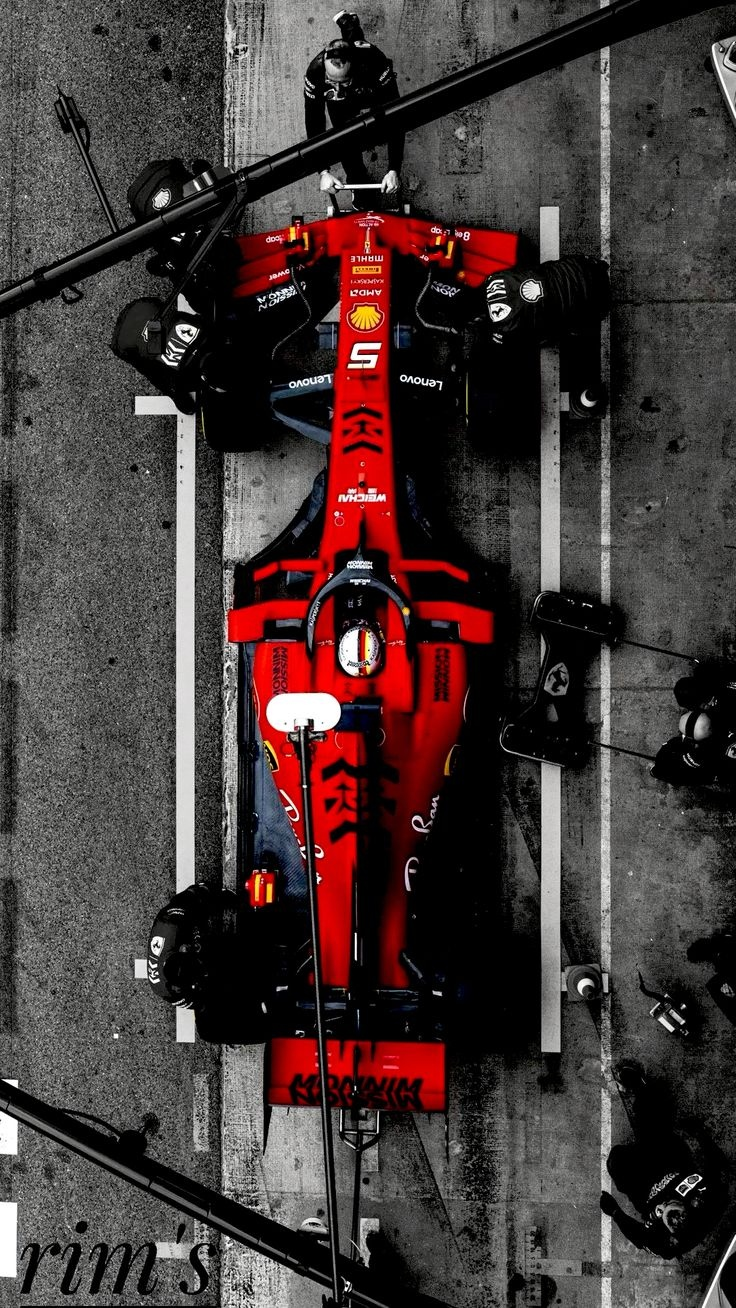

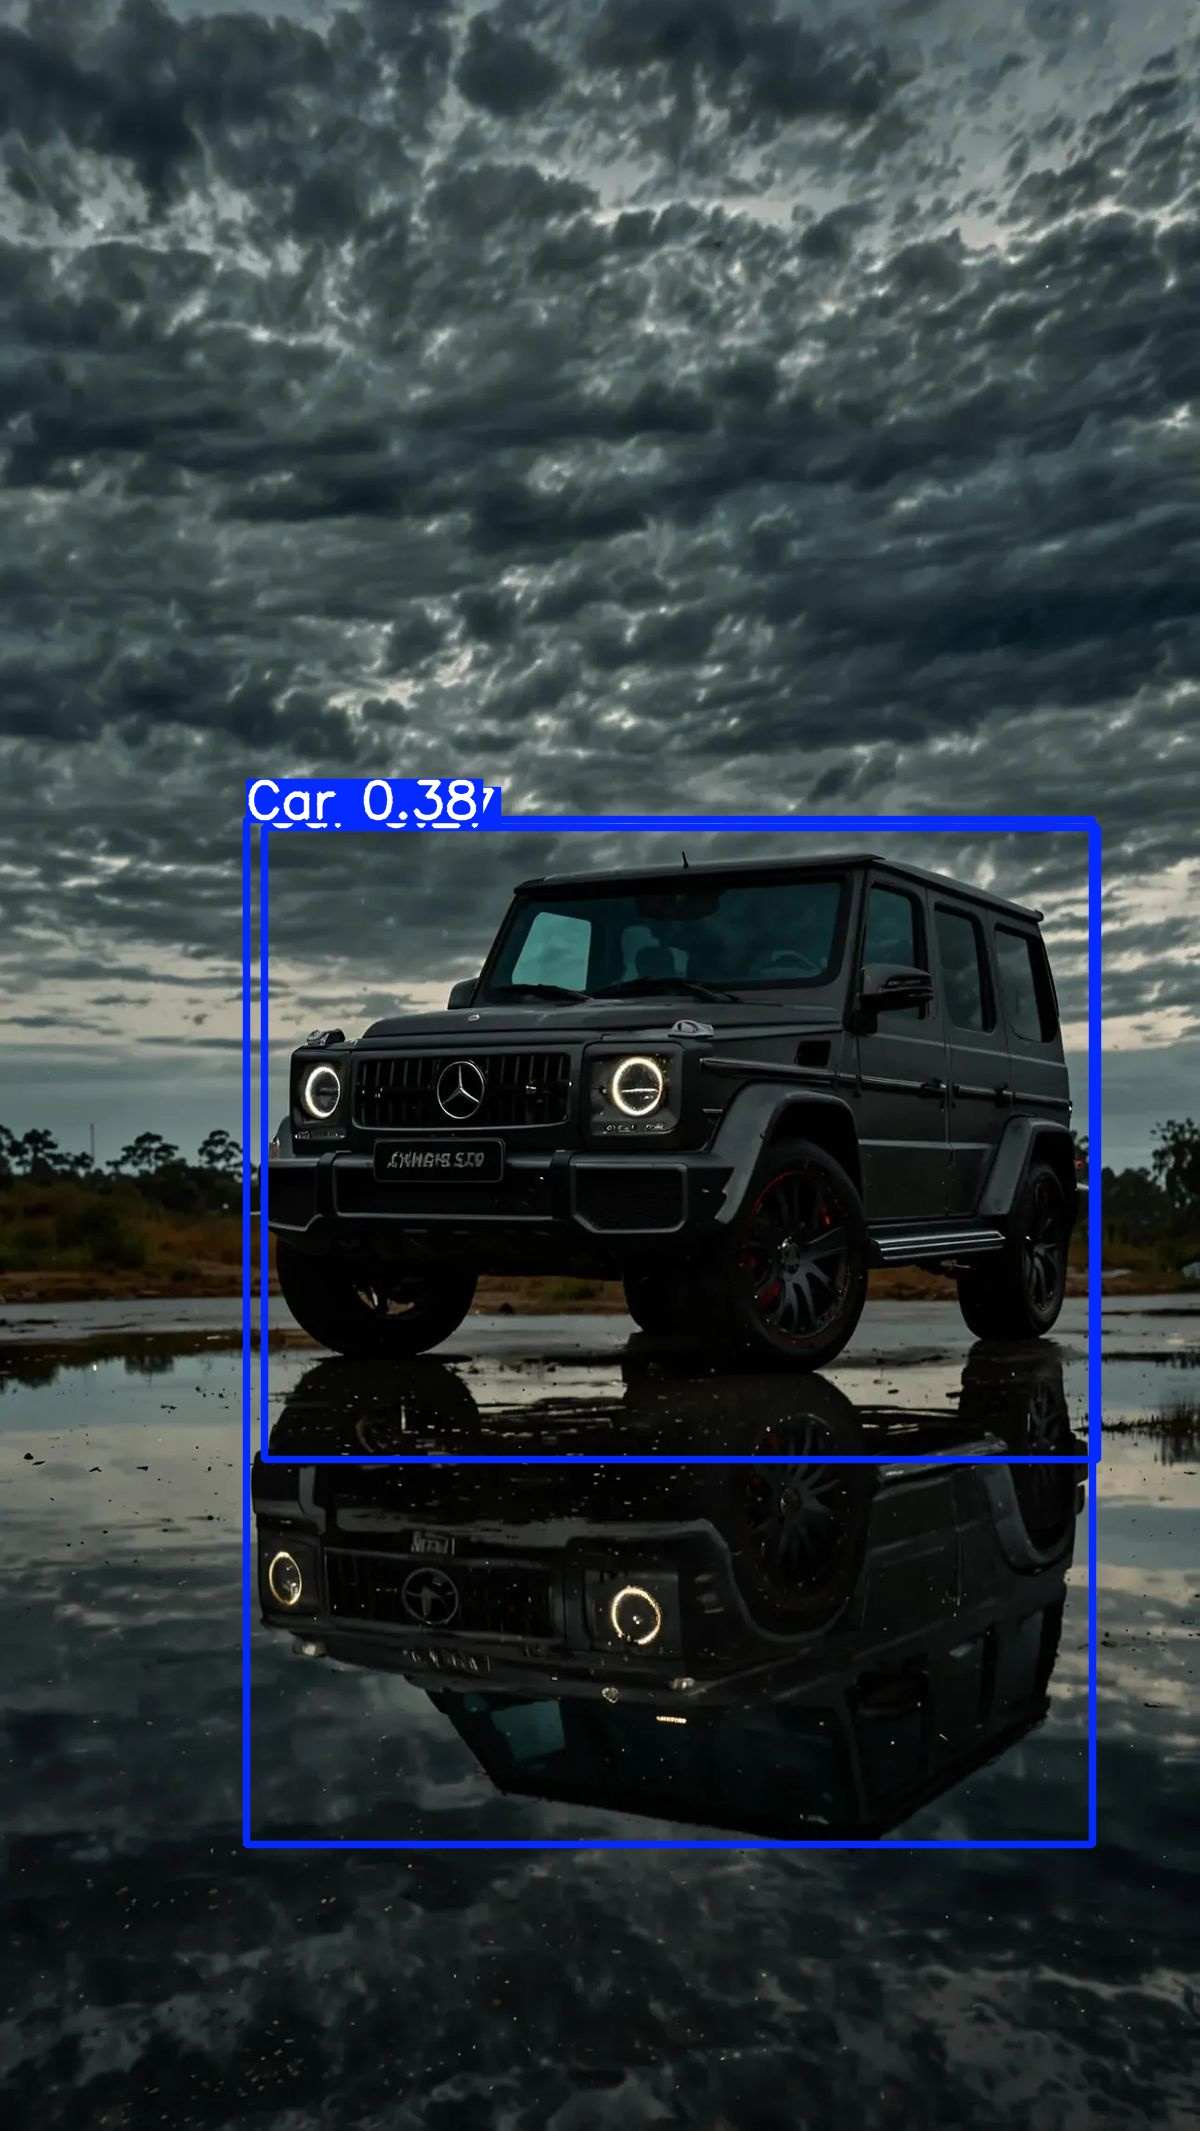

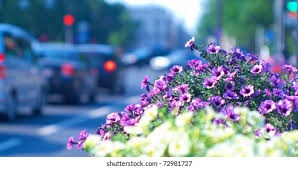

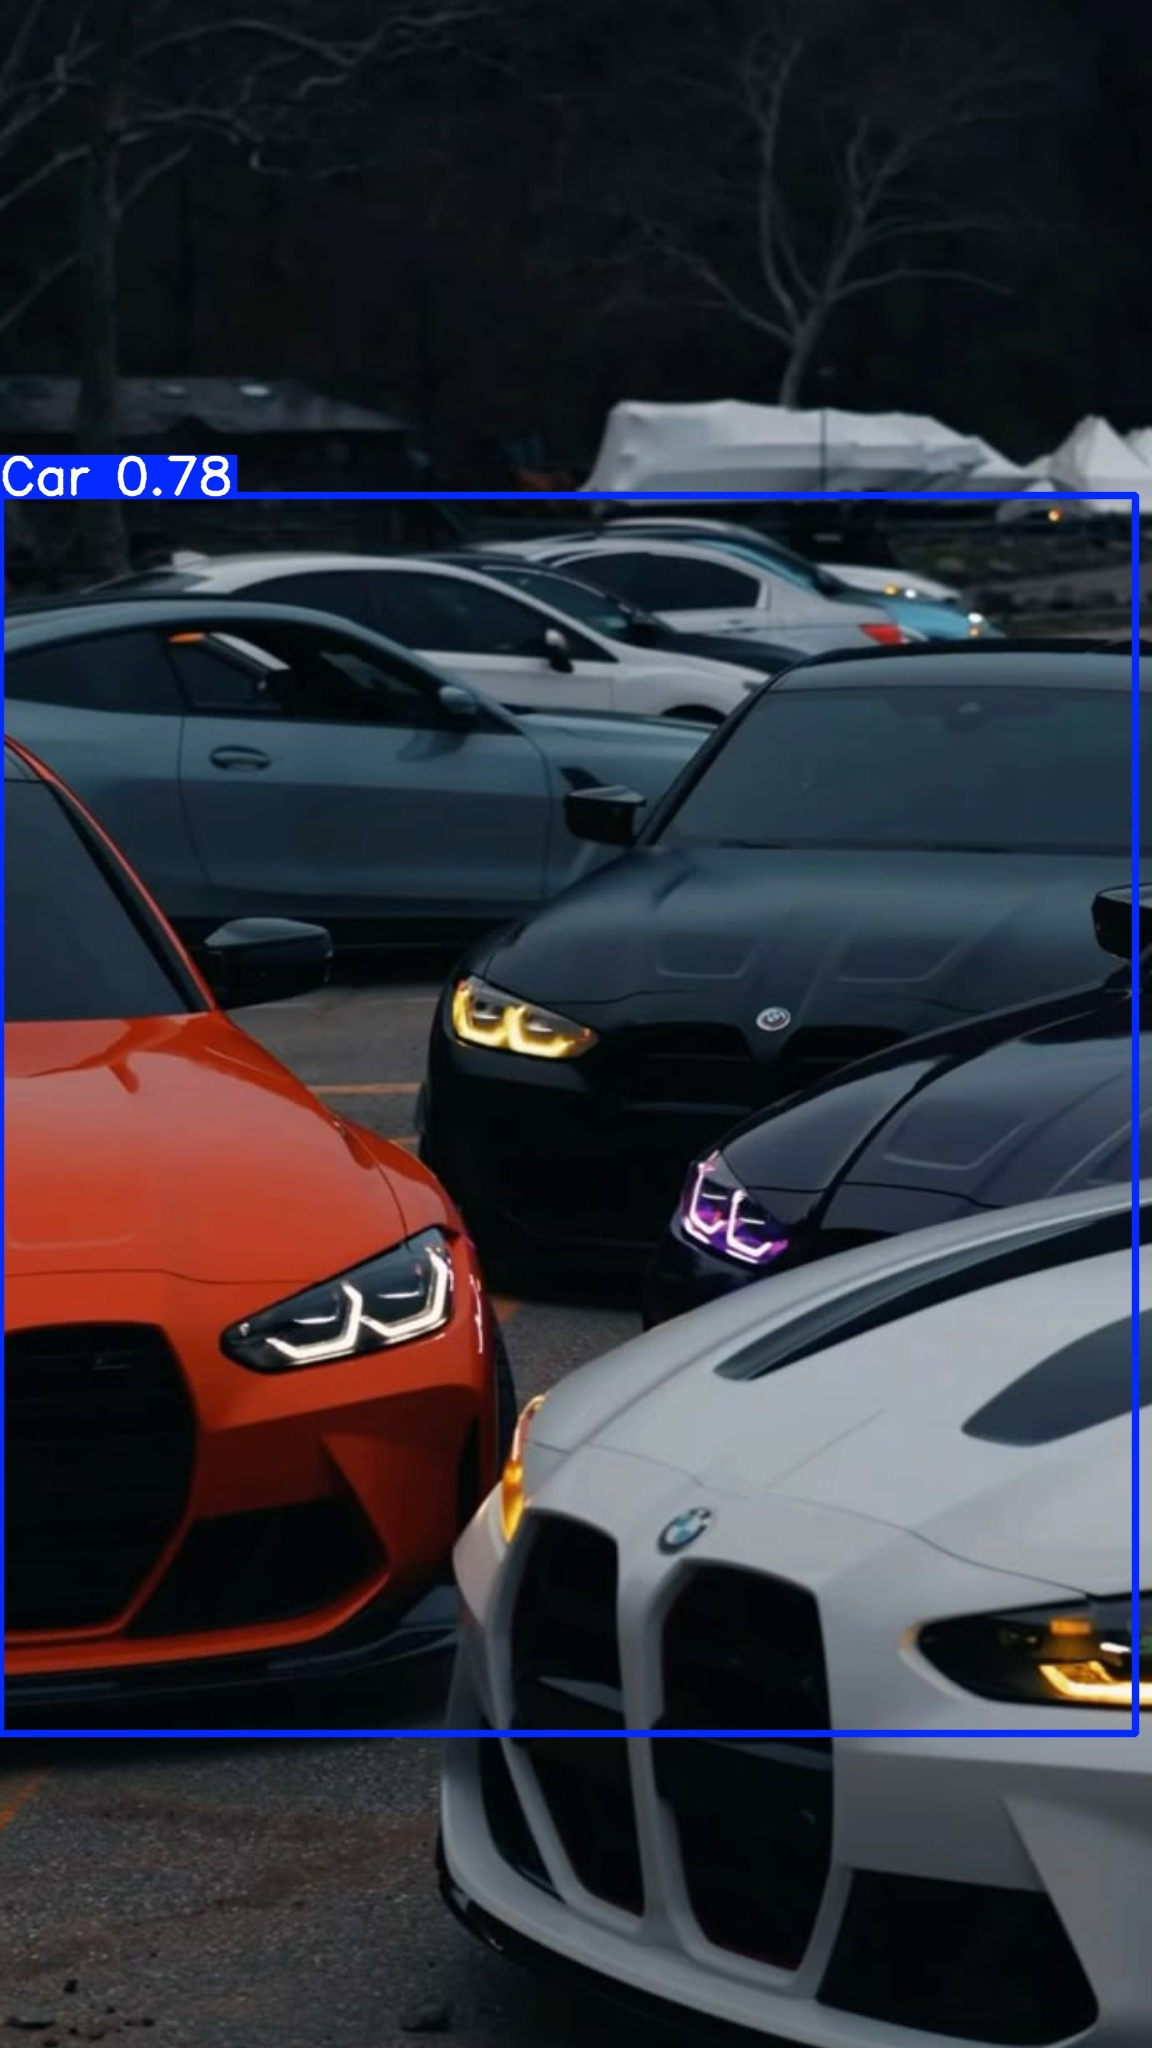

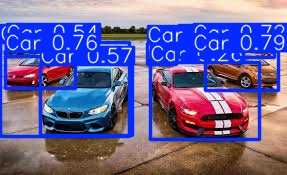

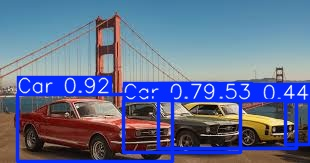

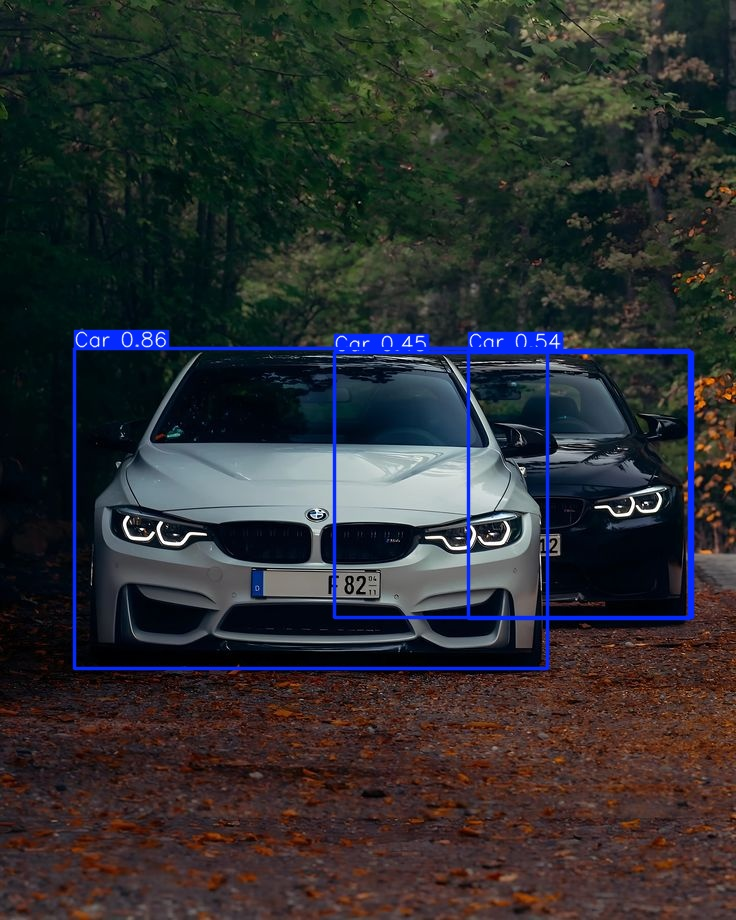

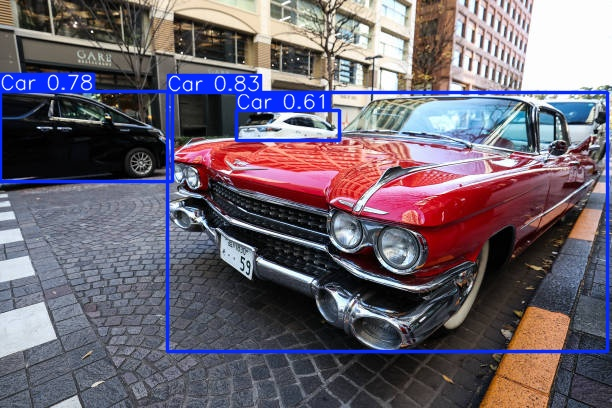

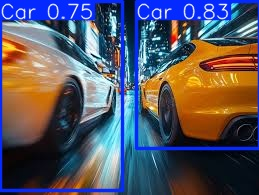

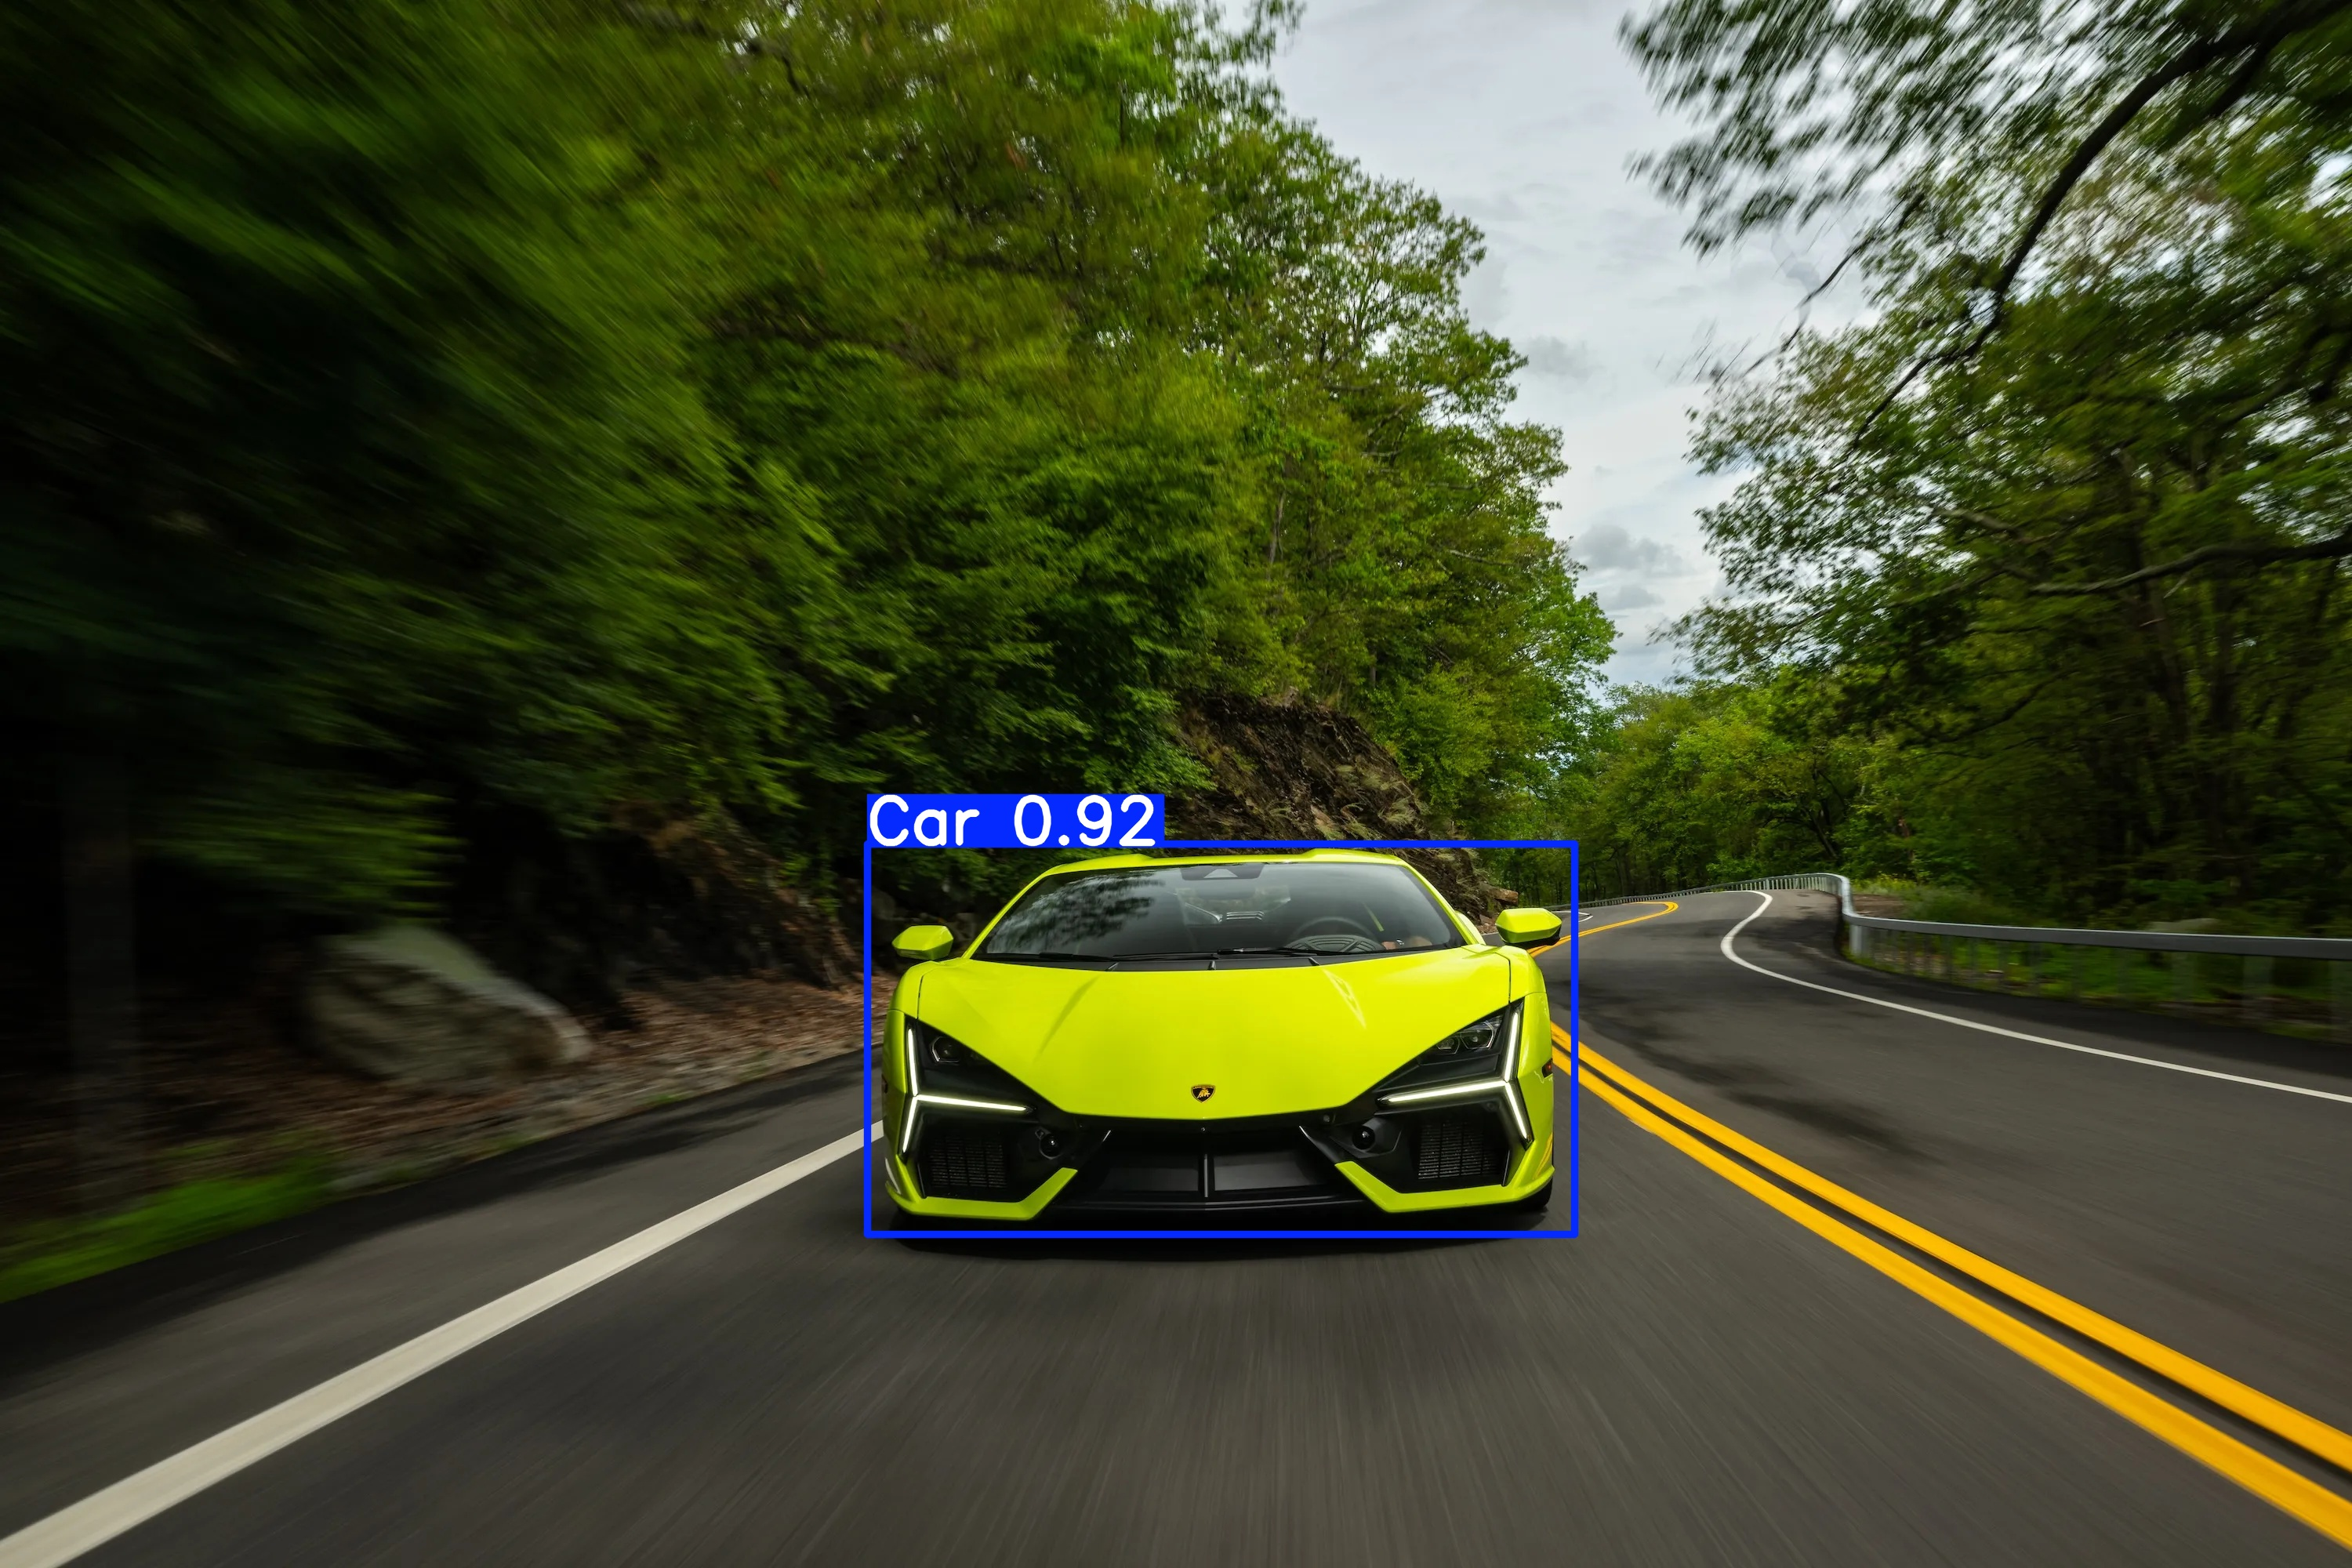

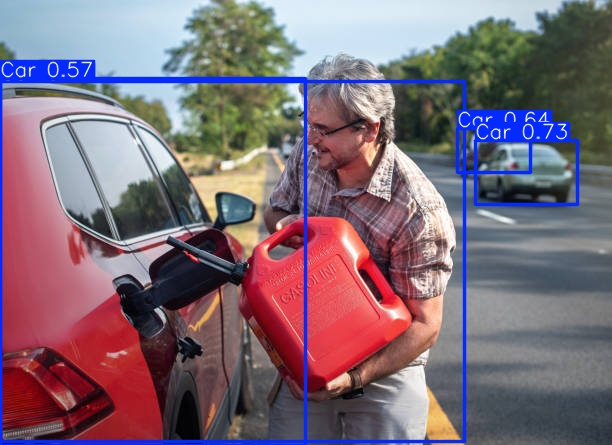

In [20]:
import os
from IPython.display import Image, display

pred_folder = "/content/runs/colab_inference/unseen_preds2"
image_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder) if f.lower().endswith((".jpg", ".png"))]

for img_path in image_files:
    display(Image(filename=img_path))
